# Data Analytics on Stock Price

### Closing Price Over Time (Line Plot)

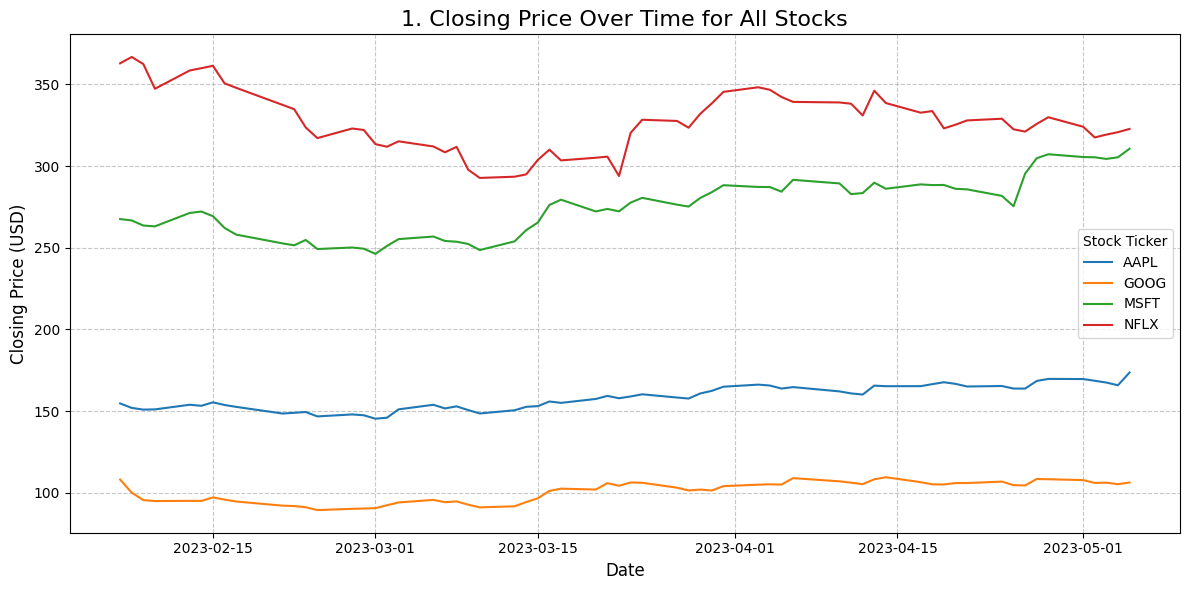

In [2]:
# Code snippet for Plot 1
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('stocks.csv')
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
for ticker, data in df.groupby('Ticker'):
    plt.plot(data['Date'], data['Close'], label=ticker)

plt.title('1. Closing Price Over Time for All Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(title='Stock Ticker')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('1_closing_price_time_series.png') 
plt.show()
# plt.close()

### Closing Price Distribution (Box Plot)

C:\Users\ADEEB INAMDAR\AppData\Local\Temp\ipykernel_10988\2092850354.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=labels, patch_artist=True, medianprops={'color': 'red'})


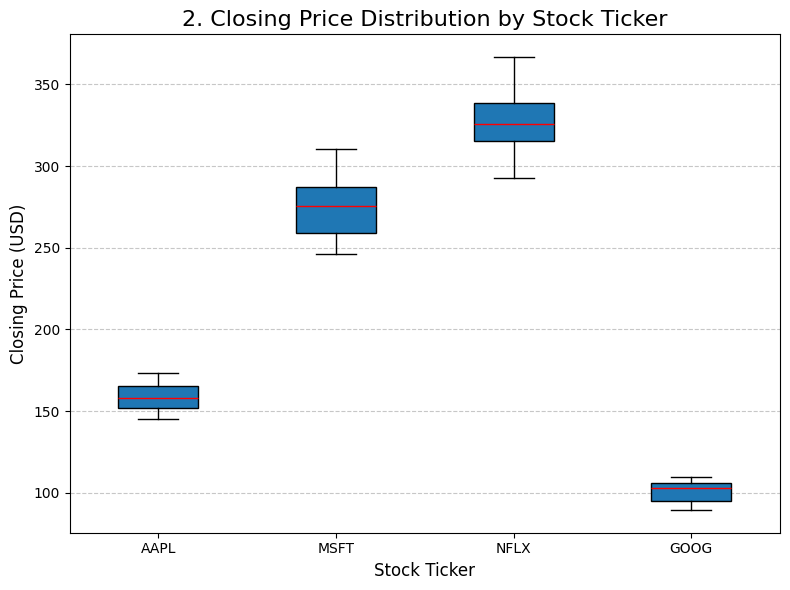

In [3]:
# Code snippet for Plot 2
# ... (setup and data loading from Plot 1)

data_for_boxplot = [df[df['Ticker'] == t]['Close'] for t in df['Ticker'].unique()]
labels = df['Ticker'].unique()

plt.figure(figsize=(8, 6))
plt.boxplot(data_for_boxplot, labels=labels, patch_artist=True, medianprops={'color': 'red'})

plt.title('2. Closing Price Distribution by Stock Ticker', fontsize=16)
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('2_closing_price_box_plot.png') 
plt.show()
# plt.close()

### Total Trading Volume (Bar Chart)

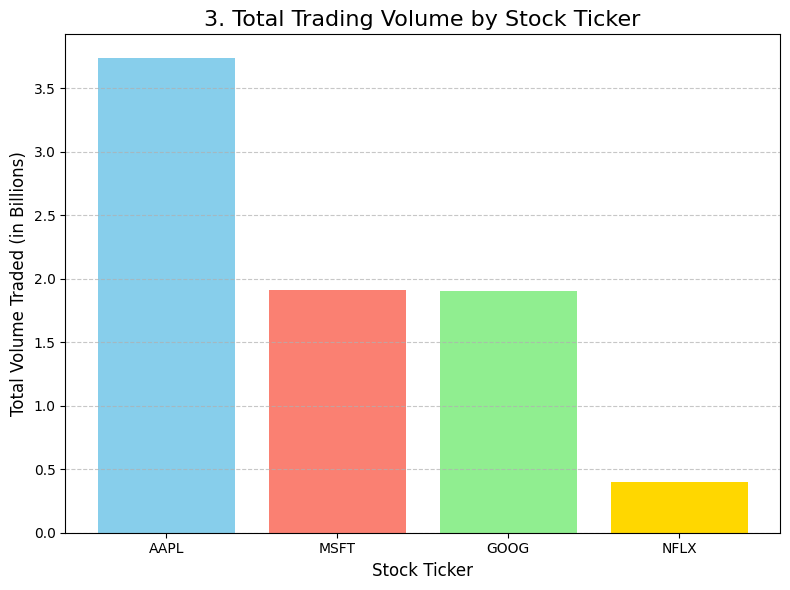

In [4]:
# Code snippet for Plot 3
# ... (setup and data loading from Plot 1)

total_volume_df = df.groupby('Ticker')['Volume'].sum().reset_index()
total_volume_df_sorted = total_volume_df.sort_values(by='Volume', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(total_volume_df_sorted['Ticker'], total_volume_df_sorted['Volume'] / 1e9, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('3. Total Trading Volume by Stock Ticker', fontsize=16)
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Total Volume Traded (in Billions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('3_total_volume_bar_chart.png') 
plt.show()
# plt.close()

### Daily returns 

($\text{Daily Return} = \frac{\text{Close}_\text{today} - \text{Close}_\text{yesterday}}{\text{Close}_\text{yesterday}}$) are essential for assessing risk. We calculate this for the Adjusted Close price.

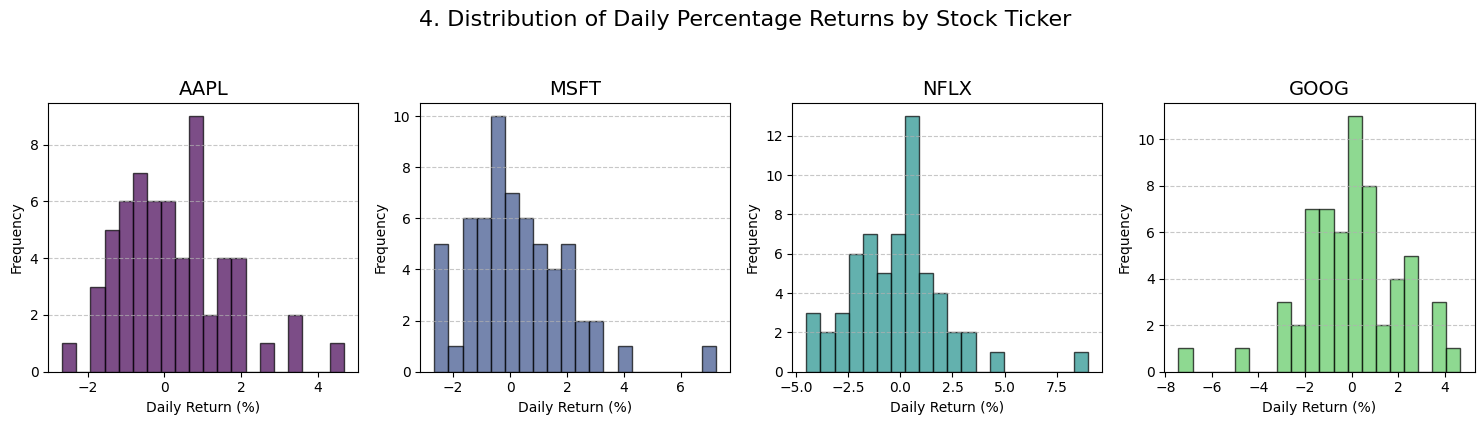

In [7]:
df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change() * 100
returns_df = df.dropna(subset=['Daily Return'])

tickers = returns_df['Ticker'].unique()
num_tickers = len(tickers)

plt.figure(figsize=(15, 4))
for i, ticker in enumerate(tickers):
    plt.subplot(1, num_tickers, i + 1)
    plt.hist(returns_df[returns_df['Ticker'] == ticker]['Daily Return'], bins=20, edgecolor='black', alpha=0.7, color=plt.cm.viridis(i/num_tickers))
    plt.title(f'{ticker}', fontsize=14)
    plt.xlabel('Daily Return (%)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('4. Distribution of Daily Percentage Returns by Stock Ticker', fontsize=16, y=1.05)
plt.tight_layout()
# plt.savefig('4_daily_returns_histogram.png') 
plt.show()
# plt.close()